In [9]:
import json

nodes = []
edges = []

with open('hw4_data.json', 'r') as file:
    data = json.load(file)
    nodes = data.get("nodes", [])
    edges = data.get("edges", [])
    print("Nodes:", nodes)
    print("Edges:", edges)
    print("\n")

# 使用字典表示社交网络，键是用户名称，值是包含影响力分数和直接朋友的字典
social_network = {}
for node in nodes:
    user_name = node[0]
    influence_score = node[1]
    social_network[user_name] = {"influence_score": influence_score, "friends": []}

for edge in edges:
    user1 = edge[0]
    user2 = edge[1]
    weight = edge[2]
    social_network[user1]["friends"].append((user2, weight))
    social_network[user2]["friends"].append((user1, weight))

for user in social_network:
    friends_list = [friend[0] for friend in social_network[user]["friends"]]
    print(f"{user} 的直接朋友: {friends_list}")


Nodes: [['Yanyan-Wang', 50.95], ['Aarebecca', 23.82], ['pomelo-nwu', 22.36], ['tyn1998', 16.64], ['frank-zsy', 15.8], ['will-ww', 13.5], ['zhicheng-ning', 8.35], ['xgdyp', 7.58], ['stevending1st', 6.28], ['andyhuang18', 6.27], ['Zzzzzhuzhiwei', 6.21], ['wxharry', 4.79], ['bifenglin', 4.01], ['yangzy0603', 3.83], ['lidongze0629', 3.73], ['wj23027', 3.56], ['PureNatural', 3.37], ['kunal8411', 3.36], ['birdflyi', 3.28], ['lhbvvvvv', 3.12], ['xiaoya-yaya', 2.39], ['stealth-bombeer', 2.36], ['yikenie', 2.31], ['RackweLLizm', 2.28], ['pranavshuklaa', 1.79], ['Vlad116', 1.79], ['Maple0817', 1.63], ['yvonneyx', 1.22], ['yubo0923', 1.12], ['zhaosj975', 1], ['longyanz', 0.74]]
Edges: [['Yanyan-Wang', 'Aarebecca', 25.3], ['Yanyan-Wang', 'pomelo-nwu', 25.09], ['Aarebecca', 'pomelo-nwu', 24.84], ['andyhuang18', 'tyn1998', 15.28], ['yangzy0603', 'pomelo-nwu', 13.85], ['bifenglin', 'will-ww', 13.32], ['tyn1998', 'pomelo-nwu', 12.48], ['yangzy0603', 'Aarebecca', 11.92], ['tyn1998', 'frank-zsy', 11.87]

In [11]:
import json

# 读取data.json文件内容
with open('hw4_data.json', 'r') as file:
    data = json.load(file)
    nodes = data.get("nodes", [])
    edges = data.get("edges", [])

# 使用字典表示社交网络
social_network = {}
for node in nodes:
    user_name = node[0]
    influence_score = node[1]
    social_network[user_name] = {"influence_score": influence_score, "friends": []}

for edge in edges:
    user1 = edge[0]
    user2 = edge[1]
    weight = edge[2]
    social_network[user1]["friends"].append((user2, weight))
    social_network[user2]["friends"].append((user1, weight))

# a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量
user_degrees = {}
for user in social_network:
    user_degrees[user] = len(social_network[user]["friends"])

sorted_user_degrees = sorted(user_degrees.items(), key=lambda x: x[1], reverse=True)[:5]
print("度数最多的前5个用户及其朋友数量:")
for user, degree in sorted_user_degrees:
    print(f"用户: {user}, 朋友数量: {degree}")

# b. 通过影响力分数（如上所示），找出影响力最高的前5个用户
sorted_nodes = sorted(nodes, key=lambda x: x[1], reverse=True)[:5]
print("影响力最高的前5个用户:")
for node in sorted_nodes:
    print(f"用户: {node[0]}, 影响力分数: {node[1]}")

# c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户
# 这里简单地将影响力得分和朋友数量标准化后相加作为综合影响力（可根据实际情况调整权重）
max_influence_score = max([node[1] for node in nodes])
max_friend_count = max(user_degrees.values())

combined_influence = {}
for user in social_network:
    normalized_influence_score = social_network[user]["influence_score"] / max_influence_score
    normalized_friend_count = user_degrees[user] / max_friend_count
    combined_influence[user] = 0.5 * normalized_influence_score + 0.5 * normalized_friend_count

sorted_combined_influence = sorted(combined_influence.items(), key=lambda x: x[1], reverse=True)
print("综合考虑影响力分数和朋友数量，最有影响力的用户:")
for user, influence in sorted_combined_influence[:5]:
    print(f"用户: {user}, 综合影响力: {influence}")

度数最多的前5个用户及其朋友数量:
用户: tyn1998, 朋友数量: 30
用户: frank-zsy, 朋友数量: 30
用户: pomelo-nwu, 朋友数量: 24
用户: andyhuang18, 朋友数量: 23
用户: wj23027, 朋友数量: 23
影响力最高的前5个用户:
用户: Yanyan-Wang, 影响力分数: 50.95
用户: Aarebecca, 影响力分数: 23.82
用户: pomelo-nwu, 影响力分数: 22.36
用户: tyn1998, 影响力分数: 16.64
用户: frank-zsy, 影响力分数: 15.8
综合考虑影响力分数和朋友数量，最有影响力的用户:
用户: Yanyan-Wang, 综合影响力: 0.7333333333333334
用户: tyn1998, 综合影响力: 0.663297350343474
用户: frank-zsy, 综合影响力: 0.655053974484789
用户: pomelo-nwu, 综合影响力: 0.6194308145240432
用户: andyhuang18, 综合影响力: 0.44486424599280344


In [18]:
import json

# 读取data.json文件内容
with open('hw4_data.json', 'r') as file:
    data = json.load(file)
    nodes = data.get("nodes", [])
    edges = data.get("edges", [])

# 使用字典表示社交网络
social_network = {}
for node in nodes:
    user_name = node[0]
    influence_score = node[1]
    social_network[user_name] = {"influence_score": influence_score, "friends": []}

for edge in edges:
    user1 = edge[0]
    user2 = edge[1]
    weight = edge[2]
    social_network[user1]["friends"].append((user2, weight))
    social_network[user2]["friends"].append((user1, weight))


# a. 对于用户Yanyan - Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）
yanyan_friends = set(social_network["Yanyan-Wang"]["friends"])
friends_of_friends = {}
for friend in social_network["Yanyan-Wang"]["friends"]:
    for fof in social_network[friend[0]]["friends"]:
        if fof[0]!= "Yanyan-Wang" and fof[0] not in yanyan_friends:
            if fof[0] not in friends_of_friends:
                friends_of_friends[fof[0]] = 1
            else:
                friends_of_friends[fof[0]] += 1

sorted_friends_of_friends = sorted(friends_of_friends.items(), key=lambda x: x[1], reverse=True)[:5]
print("对于用户Yanyan-Wang,其朋友的朋友中最有可能成为新朋友的用户及理由：")
for fof, common_friend_count in sorted_friends_of_friends:
    print(f"用户: {fof}, 共同朋友数量: {common_friend_count}")


# b. 考虑用户之间的连接强度，找出与Yanyan - Wang连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序
user_connections = {}
for edge in edges:
    if "Yanyan-Wang" in edge:
        other_user = edge[0] if edge[1] == "Yanyan-Wang" else edge[1]
        if other_user not in user_connections:
            user_connections[other_user] = edge[2]
        else:
            user_connections[other_user] += edge[2]

sorted_user_connections = sorted(user_connections.items(), key=lambda x: x[1], reverse=True)[:5]
print("与Yanyan - Wang连接强度最高的5个用户及推荐排序:")
for user, connection_strength in sorted_user_connections:
    print(f"用户: {user}, 连接强度: {connection_strength}")

对于用户Yanyan-Wang,其朋友的朋友中最有可能成为新朋友的用户及理由：
用户: pomelo-nwu, 共同朋友数量: 13
用户: yangzy0603, 共同朋友数量: 13
用户: tyn1998, 共同朋友数量: 13
用户: frank-zsy, 共同朋友数量: 13
用户: yvonneyx, 共同朋友数量: 10
与Yanyan - Wang连接强度最高的5个用户及推荐排序:
用户: Aarebecca, 连接强度: 25.3
用户: pomelo-nwu, 连接强度: 25.09
用户: yangzy0603, 连接强度: 11.85
用户: tyn1998, 连接强度: 9.62
用户: yvonneyx, 连接强度: 7.39


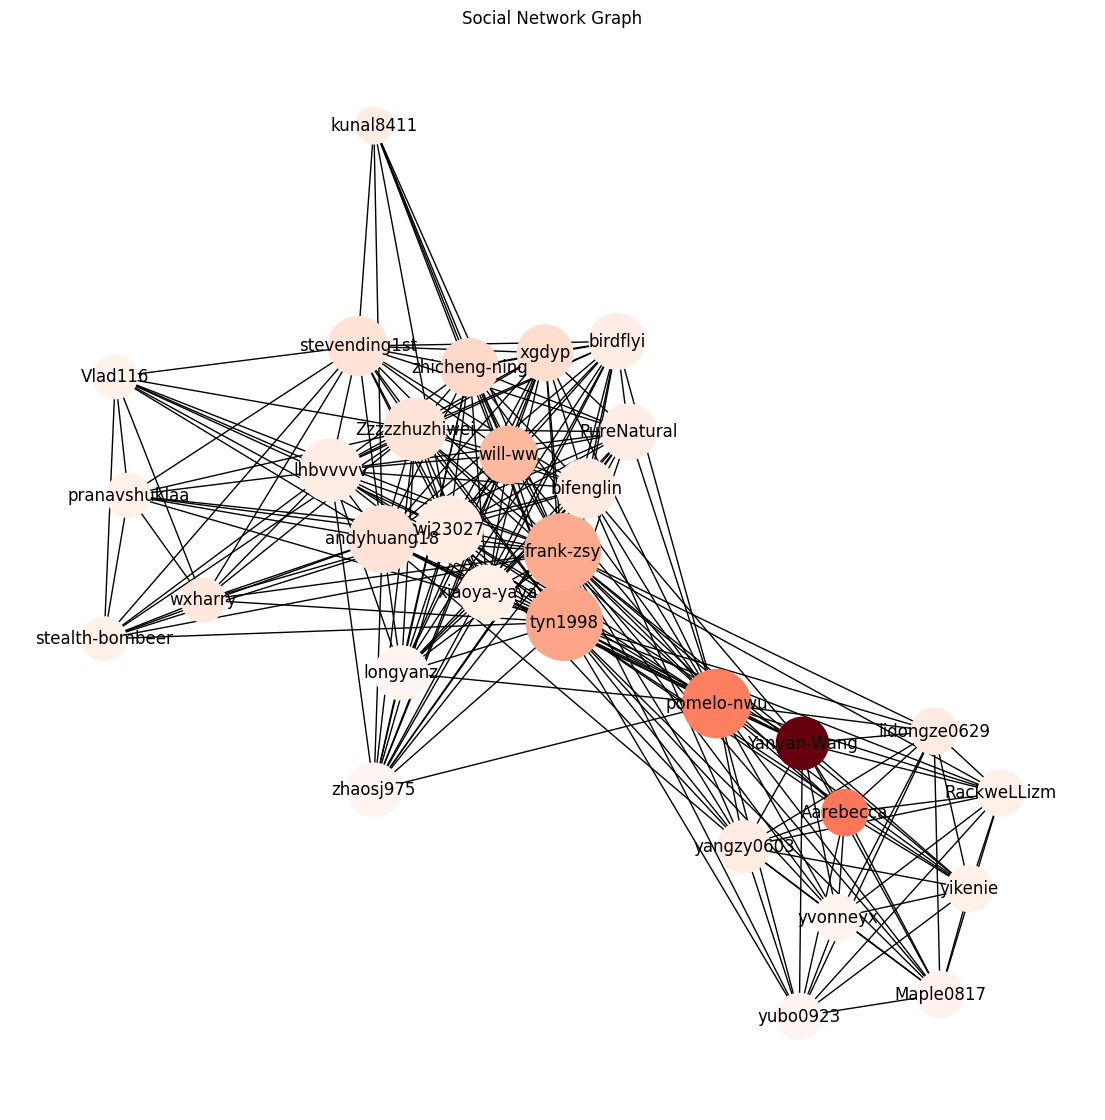

在社交网络中，影响力较大的用户通常具有以下特点：
- 节点颜色较深：表示影响力得分较高。
- 节点尺寸较大：表示度数较大，即与其他用户的连接较多。
综合这两个因素，图中颜色深且尺寸大的节点所代表的用户在社交网络中最具影响力。
最具影响力的五个用户:
用户: tyn1998
用户: frank-zsy
用户: pomelo-nwu
用户: andyhuang18
用户: wj23027


In [25]:
import json
import networkx as nx
import matplotlib.pyplot as plt

# 读取data.json文件内容
try:
    with open('hw4_data.json', 'r') as file:
        data = json.load(file)
        nodes = data.get("nodes", [])
        edges = data.get("edges", [])
except FileNotFoundError:
    print("文件data.json不存在。")
    nodes = []
    edges = []
except json.JSONDecodeError:
    print("data.json文件内容不是有效的JSON格式。")
    nodes = []
    edges = []

# 创建图对象
G = nx.Graph()

# 添加节点和边
for node in nodes:
    user_name = node[0]
    influence_score = node[1]
    G.add_node(user_name, influence=influence_score)

for edge in edges:
    user1 = edge[0]
    user2 = edge[1]
    weight = edge[2]
    G.add_edge(user1, user2, weight=weight)

# 设置图形大小
plt.figure(figsize=(14, 14))

# a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos)

# b. 对图中的节点按“影响力得分”进行着色，节点的大小则代表度数
node_sizes = [len(G[node]) * 100 for node in G.nodes()]
node_colors = [G.nodes[node]['influence'] for node in G.nodes()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Reds)
nx.draw_networkx_labels(G, pos)

plt.title("Social Network Graph")
plt.axis('off')
plt.show()

# 解释在图中哪些用户在社交网络中最具影响力
print("在社交网络中，影响力较大的用户通常具有以下特点：")
print("- 节点颜色较深：表示影响力得分较高。")
print("- 节点尺寸较大：表示度数较大，即与其他用户的连接较多。")
print("综合这两个因素，图中颜色深且尺寸大的节点所代表的用户在社交网络中最具影响力。")

# 获取节点信息（大小和颜色值）
node_sizes = [len(G[node]) * 100 for node in G.nodes()]
node_colors = [G.nodes[node]['influence'] for node in G.nodes()]

# 将节点、大小和颜色组合在一起
node_info = list(zip(G.nodes(), node_sizes, node_colors))

# 按综合影响力排序（这里简单将大小和颜色值相加，可根据实际调整权重）
sorted_node_info = sorted(node_info, key=lambda x: x[1] + x[2], reverse=True)[:5]

# 输出最具影响力的五个用户
print("最具影响力的五个用户:")
for user, size, color in sorted_node_info:
    print(f"用户: {user}")